In [32]:
%%capture stored_output
%load_ext autoreload
%autoreload 2

In [33]:
import seaborn as sns
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

## Comparing results

In [39]:
PARQUETS = ["../results/cloud_results_12062022_2100_1.parquet"]
STEPS_PER_EPOCH = 2000

In [40]:
def is_outlier(s):
    q1 = s.quantile(0.05)
    q3 = s.quantile(0.95)
    irq = q3 - q1
    lower_limit = q1 - 1.5 * irq
    upper_limit = q3 + 1.5 * irq
    return ~s.between(lower_limit, upper_limit)

In [49]:
results = []
for f in PARQUETS:
    r = pd.read_parquet(f)
    r["steps"] = r["epoch"] * STEPS_PER_EPOCH
    results.append(r)
results_df = pd.concat(results)

### Reward - value

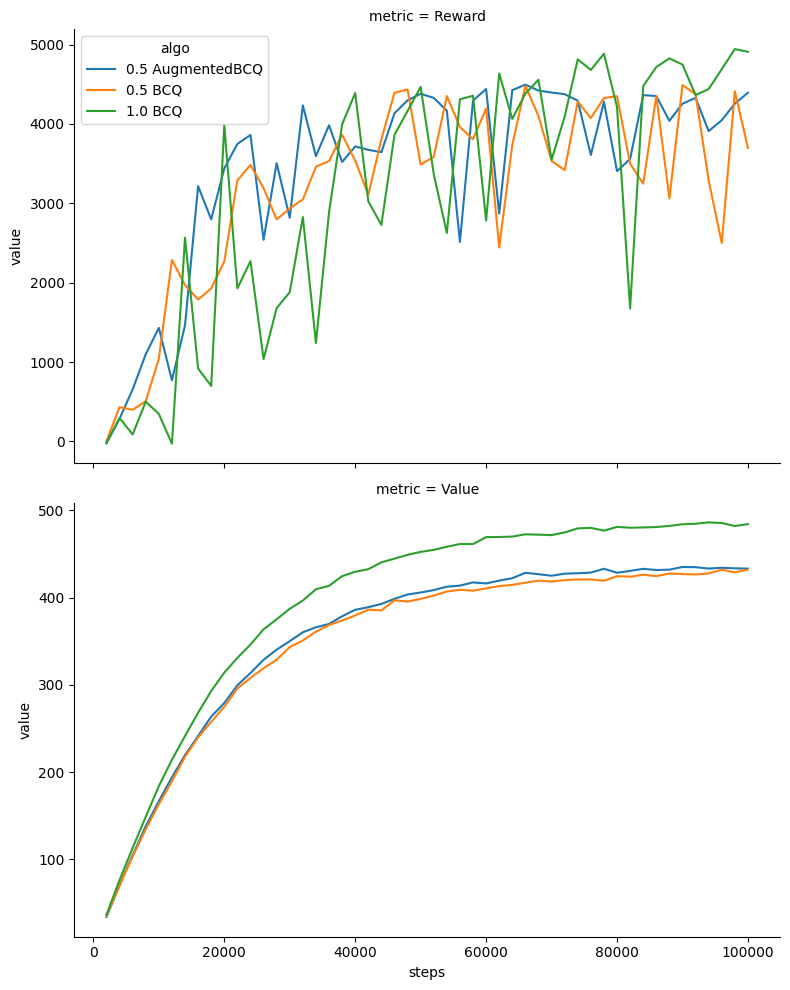

In [50]:
results_value = results_df[["env", "algo", "value_scale", "steps"]].dropna()
results_reward = results_df[["env", "algo", "environment_reward", "steps"]].dropna()
results_reward = results_reward.rename({"environment_reward": "value"}, axis=1)
results_value = results_value.rename({"value_scale": "value"}, axis=1)
results_reward["metric"] = "Reward"
results_value["metric"] = "Value"
res = pd.concat([results_reward, results_value])
g = sns.FacetGrid(
    res,
    col="metric",
    hue="algo",
    col_wrap=1,
    height=5,
    aspect=1.7,
    legend_out=False,
    sharey=False,
)
g.map_dataframe(sns.lineplot, "steps", "value")
g.add_legend()

### TD - advantage

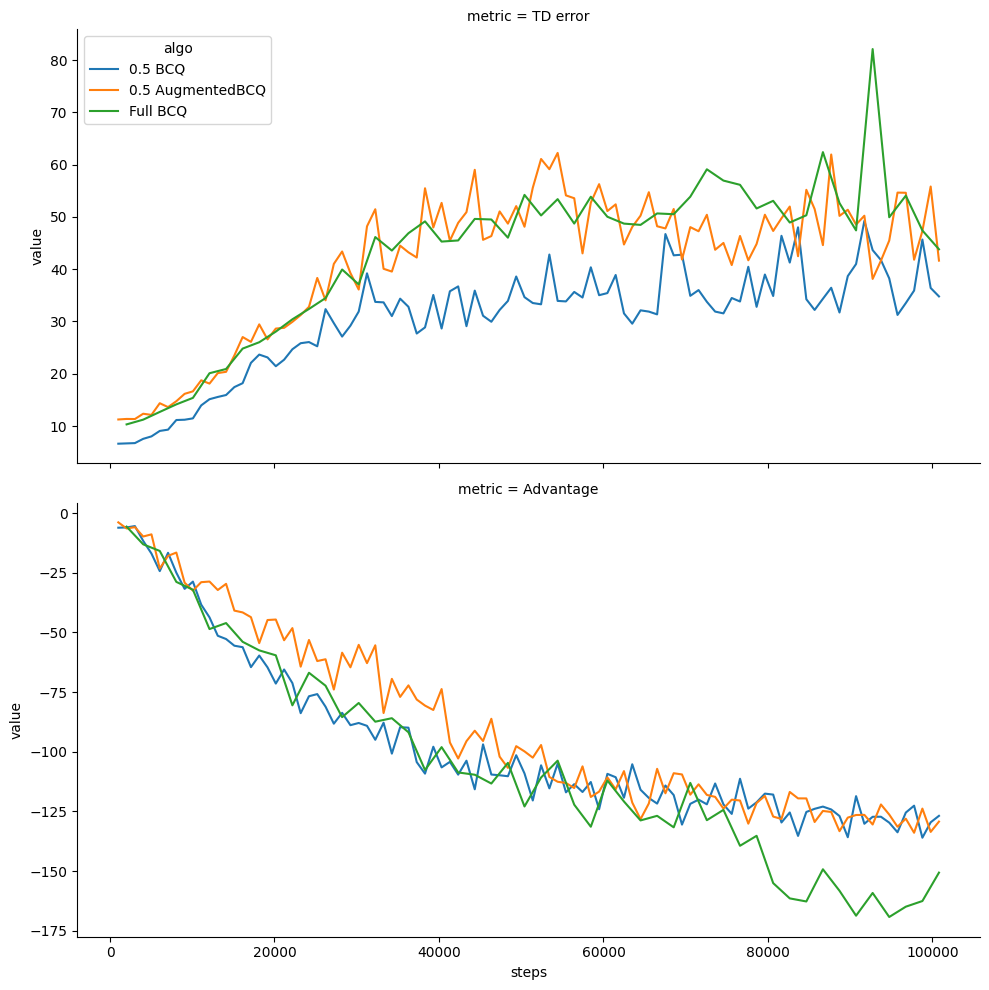

In [29]:
results_advantage = results_df[["env", "algo", "advantage", "steps"]].dropna()
results_td = results_df[["env", "algo", "td_error", "steps"]].dropna()
results_td = results_td.rename({"td_error": "value"}, axis=1)
results_advantage = results_advantage.rename({"advantage": "value"}, axis=1)
results_td["metric"] = "TD error"
results_advantage["metric"] = "Advantage"
res_2 = pd.concat([results_td, results_advantage])
g = sns.FacetGrid(
    res_2,
    col="metric",
    hue="algo",
    col_wrap=1,
    height=5,
    aspect=1.7,
    legend_out=False,
    sharey=False,
)
g.map_dataframe(sns.lineplot, "steps", "value")
g.add_legend()